In [ ]:
import numpy as np
import mikeio

In [ ]:
ds = mikeio.read("../tests/testdata/waves.dfs2")
ds

<mikeio.Dataset>
dims: (time:3, y:31, x:31)
time: 2004-01-01 00:00:00 - 2004-01-03 00:00:00 (3 records)
geometry: Grid2D (ny=31, nx=31)
items:
 0: Sign. Wave Height <Significant wave height> (meter)
 1: Peak Wave Period <Wave period> (second)
 2: Mean Wave Direction <Mean Wave Direction> (degree)

In [ ]:
ds_h = ds.interp_time(3600)
ds_h

<mikeio.Dataset>
dims: (time:49, y:31, x:31)
time: 2004-01-01 00:00:00 - 2004-01-03 00:00:00 (49 records)
geometry: Grid2D (ny=31, nx=31)
items:
 0: Sign. Wave Height <Significant wave height> (meter)
 1: Peak Wave Period <Wave period> (second)
 2: Mean Wave Direction <Mean Wave Direction> (degree)

In [ ]:
ds_h.to_dfs("waves_3h.dfs2")

In [ ]:
ts = mikeio.read("../tests/testdata/waves.dfs0")
ts

<mikeio.Dataset>
dims: (time:24)
time: 2004-01-01 01:00:00 - 2004-01-03 12:00:10 (24 non-equidistant records)
geometry: GeometryUndefined()
items:
 0: Sign. Wave Height <Undefined> (undefined)
 1: Peak Wave Period <Undefined> (undefined)
 2: Mean Wave Direction <Undefined> (undefined)

In [ ]:
dsi = ds.interp_time(ts)

In [ ]:
dsi.time

DatetimeIndex(['2004-01-01 01:00:00', '2004-01-01 02:00:00',
 '2004-01-01 03:00:00', '2004-01-01 04:00:00',
 '2004-01-01 05:00:00', '2004-01-01 06:00:00',
 '2004-01-01 07:00:00', '2004-01-01 08:00:00',
 '2004-01-01 23:00:00', '2004-01-02 00:00:00',
 '2004-01-02 01:00:00', '2004-01-02 02:00:00',
 '2004-01-02 03:00:00', '2004-01-02 04:00:00',
 '2004-01-02 05:00:00', '2004-01-02 06:00:00',
 '2004-01-02 07:00:00', '2004-01-02 08:00:00',
 '2004-01-02 09:00:00', '2004-01-02 20:00:00',
 '2004-01-02 21:00:00', '2004-01-02 23:00:00',
 '2004-01-03 00:00:00', '2004-01-03 12:00:10'],
 dtype='datetime64[ns]', freq=None)

In [ ]:
dsi["Sign. Wave Height"].shape

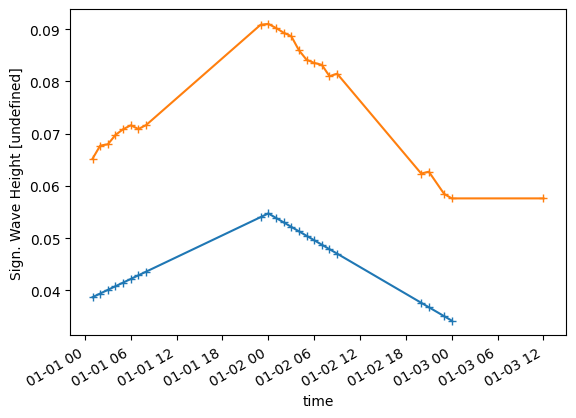

In [ ]:
ax = dsi["Sign. Wave Height"].sel(x=250, y=1200).plot(marker='+')
ts["Sign. Wave Height"].plot(ax=ax,marker='+')

In [ ]:
ts["Sign. Wave Height"]

<mikeio.DataArray>
name: Sign. Wave Height
dims: (time:24)
time: 2004-01-01 01:00:00 - 2004-01-03 12:00:10 (24 non-equidistant records)
geometry: GeometryUndefined()
values: [0.06521, 0.06771, ..., 0.0576]

In [ ]:
dsi["Sign. Wave Height"].sel(x=250, y=1200)

<mikeio.DataArray>
name: Sign. Wave Height
dims: (time:24)
time: 2004-01-01 01:00:00 - 2004-01-03 12:00:10 (24 non-equidistant records)
geometry: GeometryPoint2D(x=275.0, y=1225.0)
values: [0.0387, 0.03939, ..., nan]

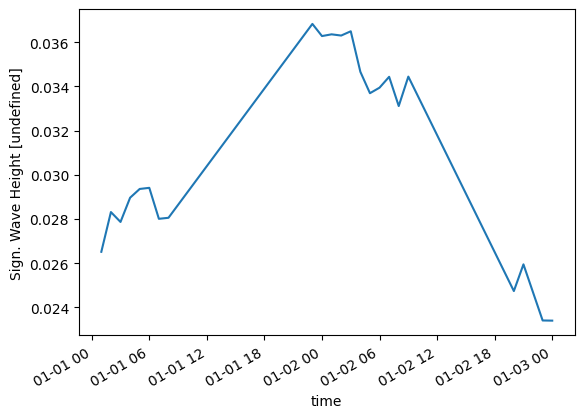

In [ ]:
diff = (ts["Sign. Wave Height"]  - dsi["Sign. Wave Height"].sel(x=250, y=1200))
diff.plot()

In [ ]:
mae = np.abs(diff).nanmean().to_numpy()
mae

np.float64(0.030895043650399082)

In [ ]:
import os
os.remove("waves_3h.dfs2")

In [ ]:
import marimo as mo

#  Time interpolation

## Interpolate to specific timestep

A common use case is to interpolate to a shorter timestep, in this case 1h.

And to store the interpolated data in a new file.

## Interpolate to time axis of another dataset

Read some non-equidistant data typically found in observed data.

The observed timeseries is longer than the modelled data. Default is to fill values with NaN.

## Model validation

A common metric for model validation is mean absolute error (MAE).

In the example below we calculate this metric using the model data interpolated to the observed times.

For a more elaborate model validation library which takes care of these things for you as well as calculating a number of relevant metrics, take a look at [fmskill](https://github.com/DHI/fmskill).

Use `np.nanmean` to skip NaN.

# Clean up